# 2D Kelvin Helmholtz Instability

## Imports

In [16]:
# %pip install ../

# numerics
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)

# timing
from timeit import default_timer as timer

# plotting
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# fluids
from jf1uids import SimulationConfig
from jf1uids import get_helper_data
from jf1uids import SimulationParams
from jf1uids import time_integration
from jf1uids.fluid_equations.fluid import construct_primitive_state2D

from jf1uids import get_registered_variables


## Initiating the Kelvin Helmholtz Instability

In [17]:
from jf1uids.option_classes.simulation_config import BACKWARDS, FORWARDS, MINMOD, OSHER, PERIODIC_BOUNDARY, BoundarySettings, BoundarySettings1D

print("👷 Setting up simulation...")

# simulation settings
gamma = 5/3

# spatial domain
box_size = 1.0
num_cells = 512

fixed_timestep = False
scale_time = False
dt_max = 0.1
num_timesteps = 2000

# setup simulation config
config = SimulationConfig(
    runtime_debugging = False,
    first_order_fallback = False,
    dimensionality = 2,
    box_size = box_size, 
    num_cells = num_cells,
    fixed_timestep = fixed_timestep,
    differentiation_mode = FORWARDS,
    num_timesteps = num_timesteps,
    boundary_settings = BoundarySettings(x = BoundarySettings1D(PERIODIC_BOUNDARY, PERIODIC_BOUNDARY), y = BoundarySettings1D(PERIODIC_BOUNDARY, PERIODIC_BOUNDARY)),
    limiter = MINMOD
)

helper_data = get_helper_data(config)

params = SimulationParams(
    t_end = 2.0,
    C_cfl = 0.4
)

registered_variables = get_registered_variables(config)

👷 Setting up simulation...


## Setting the initial state

In [18]:
from jax.random import PRNGKey, uniform

# Set the random seed for reproducibility
key = PRNGKey(0)

# Grid size and configuration
num_cells = config.num_cells
x = jnp.linspace(0, 1, num_cells)
y = jnp.linspace(0, 1, num_cells)
X, Y = jnp.meshgrid(x, y, indexing="ij")

# Initialize state
rho = jnp.ones_like(X)
u_x = 0.5 * jnp.ones_like(X)
u_y = 0.01 * jnp.sin(2 * jnp.pi * X)

# between y = 0.25 and y = 0.75 set u_x to -0.5 and rho to 2.0
mask = (Y > 0.25) & (Y < 0.75)
u_x = jnp.where(mask, -0.5, u_x)
rho = jnp.where(mask, 2.0, rho)

# Initialize pressure
p = jnp.ones((num_cells, num_cells)) * 2.5


# initial state
initial_state = construct_primitive_state2D(rho, u_x, u_y, p, registered_variables)

## Simulation and Gradient

In [19]:
final_state = time_integration(initial_state, config, params, helper_data, registered_variables)

## Visualization

### Cut

ValueError: 'jet2' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

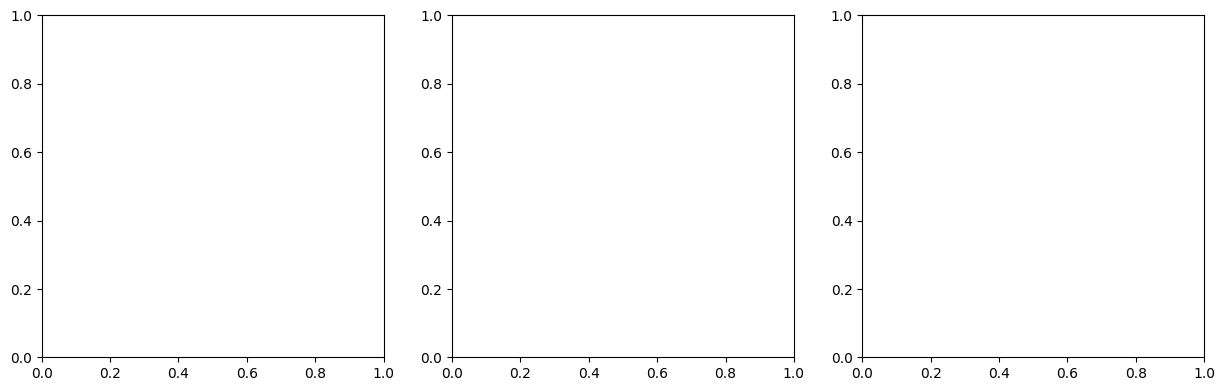

In [22]:
from matplotlib.colors import LogNorm

s = 15

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# equal aspect ratio
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax3.set_aspect('equal', 'box')

x = jnp.linspace(0, box_size, num_cells)
y = jnp.linspace(0, box_size, num_cells)

ym, xm = jnp.meshgrid(x, y)

# on the first axis plot the density
# log scaler
norm_rho = LogNorm(vmin = jnp.min(final_state[0, :, :]), vmax = jnp.max(final_state[0, :, :]), clip = True)
norm_p = LogNorm(vmin = jnp.min(final_state[3, :, :]), vmax = jnp.max(final_state[3, :, :]), clip = True)

ax1.scatter(xm.flatten(), ym.flatten(), c = final_state[0, :, :].flatten(), s = s, norm = norm_rho, marker = "s", cmap = "jet")
ax1.set_title("Density")

# on the second axis plot the absolute velocity
# abs_vel = jnp.sqrt(final_state[1, :, :]**2 + final_state[2, :, :]**2)

# vel_norm = LogNorm(vmin = jnp.min(abs_vel), vmax = jnp.max(abs_vel), clip = True)

ax2.scatter(xm.flatten(), ym.flatten(), c = final_state[1, :, :], s = s, marker = "s")
ax2.set_title("Velocity")

# on the third axis plot the pressure
ax3.scatter(xm.flatten(), ym.flatten(), c = final_state[3, :, :].flatten(), s = s, marker = "s") # , norm = norm_p)
ax3.set_title("Pressure")
